In [8]:
# Testing for AE298 online simple shock tube calculator
# https://gitlab.com/fantaz/simple_shock_tube_calculator/-/blob/master/README.md

from shocktubecalc import sod
import matplotlib.pyplot as plt
import numpy as np

In [2]:
positions, regions, values = sod.solve(left_state=(1, 1, 0), right_state=(0.1, 0.125, 0.),
                                       geometry=(0., 1., 0.5), t=0.2, gamma=1.4, npts=500)

In [3]:
print('Positions:')
for desc, vals in positions.items():
    print('{0:10} : {1}'.format(desc, vals))

Positions:
Head of Rarefaction : 0.26335680867601535
Foot of Rarefaction : 0.48594543748776337
Contact Discontinuity : 0.68549052400979
Shock      : 0.8504311464060357


In [4]:
print('States:')
for desc, vals in regions.items():
    print('{0:10} : {1}'.format(desc, vals))

States:
Region 1   : (1, 1, 0)
Region 2   : RAREFACTION
Region 3   : (0.30313017805064685, 0.4263194281784952, 0.92745262004895)
Region 4   : (0.30313017805064685, 0.2655737117053071, 0.92745262004895)
Region 5   : (0.1, 0.125, 0.0)


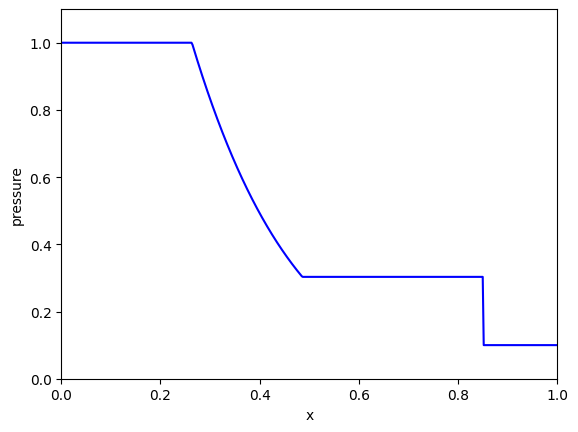

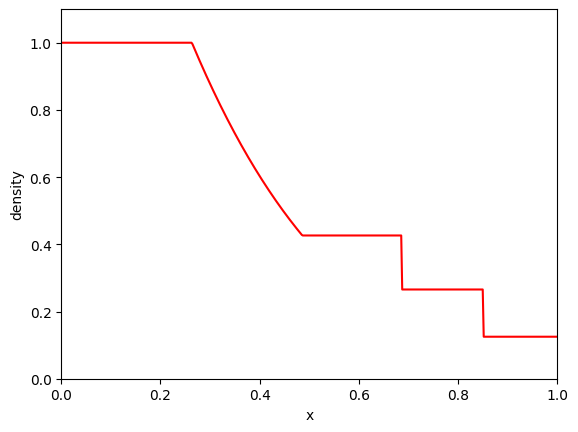

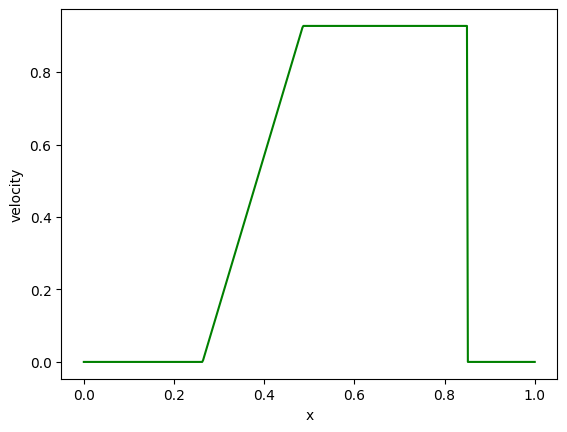

In [6]:
plt.figure(1)
plt.plot(values['x'], values['p'], linewidth=1.5, color='b')
plt.ylabel('pressure')
plt.xlabel('x')
plt.axis([0, 1, 0, 1.1])

plt.figure(2)
plt.plot(values['x'], values['rho'], linewidth=1.5, color='r')
plt.ylabel('density')
plt.xlabel('x')
plt.axis([0, 1, 0, 1.1])

plt.figure(3)
plt.plot(values['x'], values['u'], linewidth=1.5, color='g')
plt.ylabel('velocity')
plt.xlabel('x')

plt.show()


In [10]:
gamma = 1.4

e = values['p'] / (gamma - 1) / values['rho']
E = values['p']/(gamma-1.) + 0.5*values['rho']*values['u']**2
T = values['p'] / values['rho']
c = np.sqrt(gamma * values['p'] / values['rho'])
M = values['u'] / c
h = e + values['p']/values['rho']